# Sujet E : Détermination du type d’AP Wifi, par zone

## Introduction :
Un AP WiFi controller (également appelé "point d'accès sans fil contrôleur") est un dispositif qui permet de gérer et de contrôler un groupe d'AP WiFi. Il s'agit généralement d'un appareil dédié ou d'un logiciel qui peut être installé sur un serveur ou un ordinateur.

Le rôle d'un AP WiFi controller est de faciliter la gestion et la configuration des AP WiFi de manière centralisée. Il permet de configurer les paramètres de chaque AP WiFi de manière uniforme, de surveiller leur performance et de gérer leur sécurité.

Le AP WiFi controller peut être utilisé pour définir les paramètres de sécurité du réseau WiFi, comme le nom du réseau (SSID), le type de chiffrement et le mot de passe de sécurité. Il peut également être utilisé pour surveiller l'état des AP WiFi et recevoir des alertes en cas de problèmes ou de performances insuffisantes.

Un AP WiFi relai (également appelé "point d'accès sans fil répéteur") est un dispositif qui permet de étendre la portée d'un réseau WiFi en amplifiant le signal WiFi existant. Il se connecte au réseau WiFi et le transmet à d'autres appareils qui se trouvent à proximité.

Le AP WiFi relai est particulièrement utile dans les endroits où le signal WiFi est faible ou où il y a des obstacles qui bloquent le signal. Il peut être utilisé pour étendre la portée d'un réseau WiFi dans un bâtiment, une maison ou un jardin, par exemple.

Un AP WiFi simple (également appelé "point d'accès sans fil") est un dispositif qui permet de créer un réseau WiFi local (WLAN). Il permet aux appareils équipés de la technologie WiFi de se connecter à Internet ou à un réseau local en utilisant des ondes radio.

Les AP WiFi simples sont souvent utilisés pour fournir une connexion Internet dans les endroits où il est difficile ou coûteux de déployer des câbles, tels que les grands espaces ouverts, les bâtiments en construction, les parcs, etc. Ils sont également couramment utilisés dans les entreprises pour créer un réseau local privé qui permet aux employés de se connecter à Internet et aux autres appareils du réseau.

### Notions abordées :
* Plus court chemin dans un graphe

### Sujet :

Parmi les n AP d’un réseau Wifi, il y a k AP contrôleurs. Ces AP contrôleurs (de type
C) communiquent entre eux les informations de contrôle du réseau. Chaque
contrôleur communique aux AP de sa zone ces informations de contrôle. Les autres
AP peuvent être de simple AP (de type S) destinées à la connexion des utilisateurs
ou bien des AP Relais (de type R) permettant de relayer les informations de contrôle
provenant des contrôleurs. Bien sûr, les caractéristiques (donc le coût) des trois types
d’AP (C, R ou S) sont différents. C’est pourquoi il est déterminant de bien les
distinguer.

On cherche à minimiser le trafic : pour cela, on affectera chaque AP (non contrôleur)
à la zone du contrôleur le plus proche.

Développer un logiciel permettant, à partir des coordonnées (x,y) de chaque AP et
de la liste des contrôleurs, de répartir les AP dans les zones dirigés par chaque
contrôleur puis de statuer sur leur type (S ou R).

## En entrée :

Nous avons codés un script python qui nous génére :
Le fichier des noms et coordonnées de tous les AP. Chaque ligne correspond à un AP.
Et le fichier contenant la liste des noms des
contrôleurs.

#### generation.py :

In [1]:
import random as rd

def gen_ligne(nbr_lignes):
    aps = []
    for i in range(1, nbr_lignes+1):
        ligne = f"{i} ({rd.randint(-200, 200)}, {rd.randint(-200, 200)}) {rd.randint(10, 50)}"
        aps.append(ligne)
    return aps

def gen_fichier(longeur):
    aps = gen_ligne(longeur)
    with open("Test/test_AP.txt", 'w') as f:
        for ap in aps:
            f.write(f'{ap}\n')

    apcs = []
    with open("Test/test_APC.txt", 'w') as f:
        for x in range(0, (len(aps)//10)):
            apc = rd.randint(1, len(aps))
            if apc not in apcs:
                apcs.append(apc)
                f.write(f"{apc} ")

gen_fichier(50)

Ce qui nous donne un premier fichier qui se présente sous cette forme :
> 1 (-93, 69) 27\
2 (180, -199) 17\
3 (-181, 150) 12\
4 (-82, 182) 14\
5 (93, 22) 19\
6 (126, -26) 11\
7 (-51, 38) 30\
8 (136, 29) 14\
9 (-151, 71) 28\
10 (70, -111) 12\
...

Puis un seconde fichier avec les noms des controllers :
> 19 38 9 26 29 

## Traitement 

#### Ap.py :

In [4]:
import math

class AP():
    def __init__(self, index=0, coord=(0, 0) , rayon=0, color='white', type_ap = 'S'):
        self.index = index
        self.coord = coord
        self.rayon = rayon
        self.color = color
        self.type_ap = type_ap
        

    def __str__(self):
        return f"AP n°{self.index}\nCoordonnées: {self.coord}\nRayon de coverture: {self.rayon}\nCouleur: {self.color}\nType: {self.type_ap}"

    def IntersectionCouverture(self, ap):
        distanceCentres = math.sqrt((self.coord[0]-ap.coord[0])**2 + (self.coord[1]-ap.coord[1])**2) 
        
        if distanceCentres <= (self.rayon + ap.rayon):
            return True
        
        return False

#### topologie.py

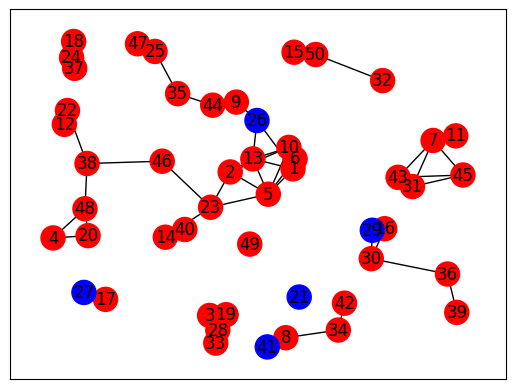

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
import ap

def ExtractionDesAP(fichier_ap, fichier_apc):

    #Liste et dictionnaire des AP et AP controleurs
    aps = {}
    apcs = []

    #Extraction des lignes (APs) dans une liste
    with open(fichier_ap, 'r') as f:
        lignes = f.readlines()

    #Création de liste d'index des AP controleurs
    with open(fichier_apc, 'r') as f:
        apcs = f.readline().strip().split(' ')

    #Boucle de création des AP
    for x in lignes:
        x.strip()
        
        #Extraction de l'index (2 premiers caractères)
        index = x[:2].strip()

        #Extraction du rayon (2 derniers caractères)
        rayon = x[-4:].strip()

        #Extraction des coordonnées dans tuple coord
        coord = x[x.find('(')+1:x.find(')')]
        coord = coord.split(",")
        coord = (int(coord[0]), int(coord[1]))

        #Triage de mode et couleur de AP
        if index in apcs:
            couleur = 'blue'
            type_ap = 'C'
        else:
            couleur = 'red'
            type_ap = 'S'

        #Création d'un objet AP et ajout en dictionnaire des AP
        a = ap.AP(index, coord, int(rayon), couleur, type_ap, 1)
        aps[index] = a
        #print(a)

    return aps

def topologie():

    #Création graphe représentant la topologie
    topo = nx.Graph()

    aps = ExtractionDesAP("Test/test_AP.txt", "Test/test_APC.txt")
    arrets = {}

    #Ajout des sommets représentants les AP au graphe de topologie
    for x in aps.values():
        topo.add_node(x.index, coord=x.coord, couleur=x.color, weight=x.poids)

    #Ajout des arrets représentants l'interconnexion des AP
    for ap1 in aps.values():
        for ap2 in aps.values():
            if (ap1.index != ap2.index) and (ap1.index not in arrets.values()) and (ap1.IntersectionCouverture(ap2) == True):
                topo.add_edge(ap1.index, ap2.index)
                arrets[ap1.index] = ap2.index
    
    #Ajout du poids pour les liens
    for u,v in topo.edges:
        topo[u][v]['weight'] = 1

    #print(arrets)

    return topo


def affichage(graphe):

    #Création liste de couleurs pour affichage
    colors = []

    #Stockage des coordonnées et des couleurs dans des variables
    pos = nx.get_node_attributes(graphe,'coord')
    col = nx.get_node_attributes(graphe, 'couleur')

    #Ajout des couleurs dans la liste pour affichage
    for x in col:
        colors.append(col[x])

    #Affichage
    nx.draw_networkx_nodes(graphe, pos, node_color=colors)
    nx.draw_networkx_labels(graphe, pos)
    nx.draw_networkx_edges(graphe, pos)
    #nx.draw_networkx_edge_labels(graphe, pos, edge_labels = nx.get_edge_attributes(graphe, 'weight'))
    plt.show()

affichage(topologie())